In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('SpotifyTop2000Songs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [40]:
df['Length (Duration)'] = pd.to_numeric(df['Length (Duration)'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Index                   1994 non-null   int64  
 1   Title                   1994 non-null   object 
 2   Artist                  1994 non-null   object 
 3   Top Genre               1994 non-null   object 
 4   Year                    1994 non-null   int64  
 5   Beats Per Minute (BPM)  1994 non-null   int64  
 6   Energy                  1994 non-null   int64  
 7   Danceability            1994 non-null   int64  
 8   Loudness (dB)           1994 non-null   int64  
 9   Liveness                1994 non-null   int64  
 10  Valence                 1994 non-null   int64  
 11  Length (Duration)       1990 non-null   float64
 12  Acousticness            1994 non-null   int64  
 13  Speechiness             1994 non-null   int64  
 14  Popularity              1994 non-null   

In [41]:
df.isnull().sum()

Index                     0
Title                     0
Artist                    0
Top Genre                 0
Year                      0
Beats Per Minute (BPM)    0
Energy                    0
Danceability              0
Loudness (dB)             0
Liveness                  0
Valence                   0
Length (Duration)         4
Acousticness              0
Speechiness               0
Popularity                0
dtype: int64

In [42]:
df.describe()

,Index,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1990.000000,1994.000000,1994.000000,1994.00000
mean,997.500000,1992.992979,120.215647,59.679539,53.238215,-9.008526,19.012036,49.408726,260.361809,28.858074,4.994985,59.52658
std,575.762538,16.116048,28.028096,22.154322,15.351507,3.647876,16.727378,24.858212,81.201930,29.011986,4.401566,14.35160
min,1.000000,1956.000000,37.000000,3.000000,10.000000,-27.000000,2.000000,3.000000,93.000000,0.000000,2.000000,11.00000
25%,499.250000,1979.000000,99.000000,42.000000,43.000000,-11.000000,9.000000,29.000000,212.000000,3.000000,3.000000,49.25000
50%,997.500000,1993.000000,119.000000,61.000000,53.000000,-8.000000,12.000000,47.000000,245.000000,18.000000,4.000000,62.00000
75%,1495.750000,2007.000000,136.000000,78.000000,64.000000,-6.000000,23.000000,69.750000,289.000000,50.000000,5.000000,71.00000
max,1994.000000,2019.000000,206.000000,100.000000,96.000000,-2.000000,99.000000,99.000000,966.000000,99.000000,55.000000,100.00000


In [43]:
df["Year"] = pd.to_datetime (df["Year"], format='%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Index                   1994 non-null   int64         
 1   Title                   1994 non-null   object        
 2   Artist                  1994 non-null   object        
 3   Top Genre               1994 non-null   object        
 4   Year                    1994 non-null   datetime64[ns]
 5   Beats Per Minute (BPM)  1994 non-null   int64         
 6   Energy                  1994 non-null   int64         
 7   Danceability            1994 non-null   int64         
 8   Loudness (dB)           1994 non-null   int64         
 9   Liveness                1994 non-null   int64         
 10  Valence                 1994 non-null   int64         
 11  Length (Duration)       1990 non-null   float64       
 12  Acousticness            1994 non-null   int64   

In [44]:
newer = df.set_index('Title')
df_sp = newer.drop(columns='Index')
df_sp.head()

,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Title,,,,,,,,,,,,,
Sunrise,Norah Jones,adult standards,2004-01-01,157,30,53,-14,11,68,201.0,94,3,71
Black Night,Deep Purple,album rock,2000-01-01,135,79,50,-11,17,81,207.0,17,7,39
Clint Eastwood,Gorillaz,alternative hip hop,2001-01-01,168,69,66,-9,7,52,341.0,2,17,69
The Pretender,Foo Fighters,alternative metal,2007-01-01,173,96,43,-4,3,37,269.0,0,4,76
Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002-01-01,106,82,58,-5,10,87,256.0,1,3,59


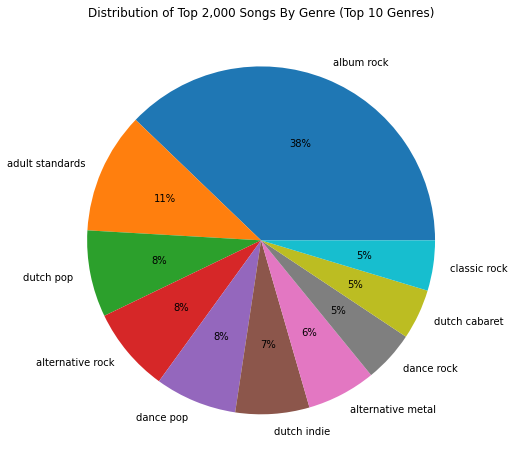

In [45]:
#What genres are more likely to produce top songs?
freq_genre = df_sp.groupby(['Top Genre']).count()
freq_genre
df_freq_genre = pd.DataFrame (data = freq_genre, columns = ['Artist'])
sorted = df_freq_genre.sort_values(by='Artist', ascending=False)
sorted_newer = sorted.rename(columns={'Artist': 'Frequency of Genre'})
sorted_final = sorted_newer[(sorted_newer['Frequency of Genre']>50)]


fig = plt.figure()
fig.set_size_inches(16,8)
plt.pie(sorted_final['Frequency of Genre'], labels=sorted_final.index, autopct='%1.0f%%')
plt.title('Distribution of Top 2,000 Songs By Genre (Top 10 Genres)')
plt.show()

In [46]:
# 	How do popular genres differ by decade?
year_index = df.set_index('Year')

#50/60
year_sorted = year_index.sort_values(by='Year', ascending = True)
dt_fifty_sixty = pd.to_datetime (1970, format='%Y')
fifty_sixty = year_sorted[(year_sorted.index<dt_fifty_sixty)]
freq1 = fifty_sixty.groupby(['Top Genre']).count()
freq1_newer = freq1['Title']
df_freq1_newer = pd.DataFrame (data = freq1_newer)
df_freq1_final = df_freq1_newer.rename(columns={'Title':'Frequency of Genre'})
df_freq1_plot = df_freq1_final[(df_freq1_final['Frequency of Genre']>5)]


# 70/80
dt_seven_eight = pd.to_datetime (1990, format='%Y')
seven_eight = year_sorted[(year_sorted.index >= dt_fifty_sixty) & (year_sorted.index < dt_seven_eight)]
freq2 = seven_eight.groupby(['Top Genre']).count()
freq2_newer = freq2['Title']
df_freq2_newer = pd.DataFrame (data = freq2_newer)
df_freq2_final = df_freq2_newer.rename(columns={'Title':'Frequency of Genre'})
df_freq2_plot = df_freq2_final[(df_freq2_final['Frequency of Genre']>15)]

#90/00
dt_century = pd.to_datetime (2010, format='%Y')
century = year_sorted[(year_sorted.index >= dt_seven_eight) & (year_sorted.index < dt_century)]
freq3 = century.groupby(['Top Genre']).count()
freq3_newer = freq3['Title']
df_freq3_newer = pd.DataFrame (data = freq3_newer)
df_freq3_final = df_freq3_newer.rename(columns={'Title':'Frequency of Genre'})
df_freq3_plot = df_freq3_final[(df_freq3_final['Frequency of Genre']>15)]

#10
present = year_sorted[(year_sorted.index >= dt_century)]
freq4 = present.groupby(['Top Genre']).count()
freq4_newer = freq4['Title']
df_freq4_newer = pd.DataFrame (data = freq4_newer)
df_freq4_final = df_freq4_newer.rename(columns={'Title':'Frequency of Genre'})
df_freq4_plot = df_freq4_final[(df_freq4_final['Frequency of Genre']>=10)]

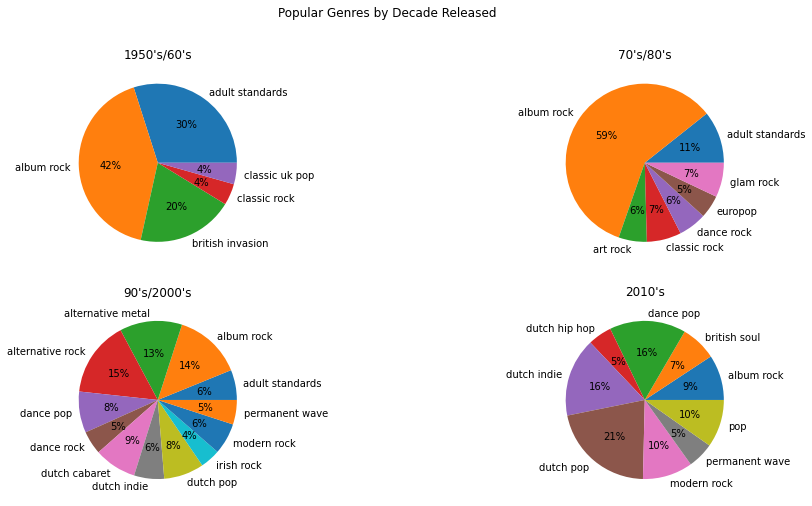

In [47]:
#graphs from above
fig = plt.figure()
fig.set_size_inches(16,8)
fig.suptitle("Popular Genres by Decade Released")
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#ax1
ax1.pie(df_freq1_plot['Frequency of Genre'], labels=df_freq1_plot.index, autopct='%1.0f%%')
ax1.set_title('1950\'s/60\'s')

#ax2
ax2.pie(df_freq2_plot['Frequency of Genre'], labels=df_freq2_plot.index, autopct='%1.0f%%')
ax2.set_title('70\'s/80\'s')

#ax3
ax3.pie(df_freq3_plot['Frequency of Genre'], labels=df_freq3_plot.index, autopct='%1.0f%%')
ax3.set_title('90\'s/2000\'s')

#ax4
ax4.pie(df_freq4_plot['Frequency of Genre'], labels=df_freq4_plot.index, autopct='%1.0f%%')
ax4.set_title('2010\'s')


plt.show()

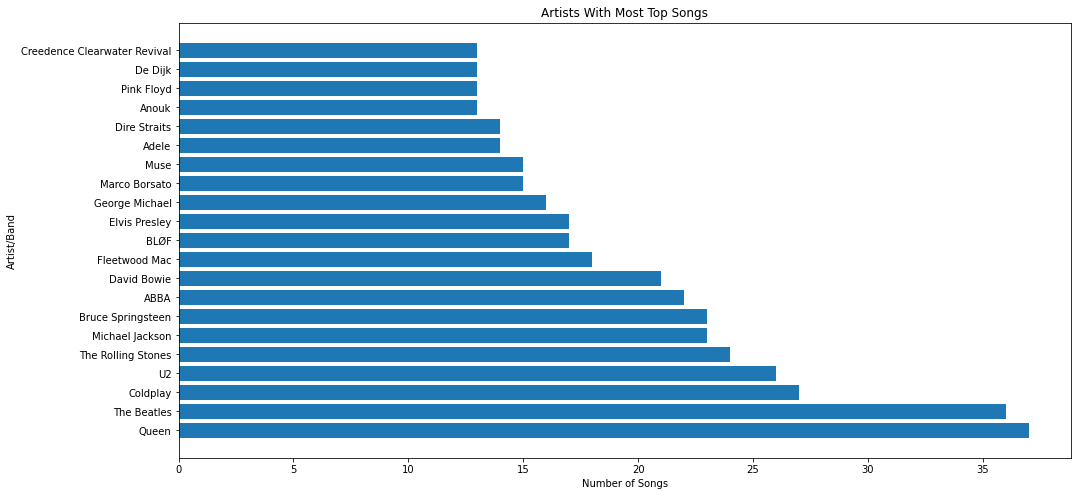

In [49]:
# Which artists have made the most top songs?
artist = df_sp['Artist'].value_counts()
artist_df = pd.DataFrame(data = artist)
artist_df_new = artist_df.rename(columns={'Artist':'Number of Songs'})
artist_df_final = artist_df_new[(artist_df_new['Number of Songs']>12)]
fig = plt.figure()
fig.set_size_inches(16,8)

plt.barh(artist_df_final.index, artist_df_final['Number of Songs'])
plt.title('Artists With Most Top Songs')
plt.ylabel('Artist/Band')
plt.xlabel('Number of Songs')
plt.show()

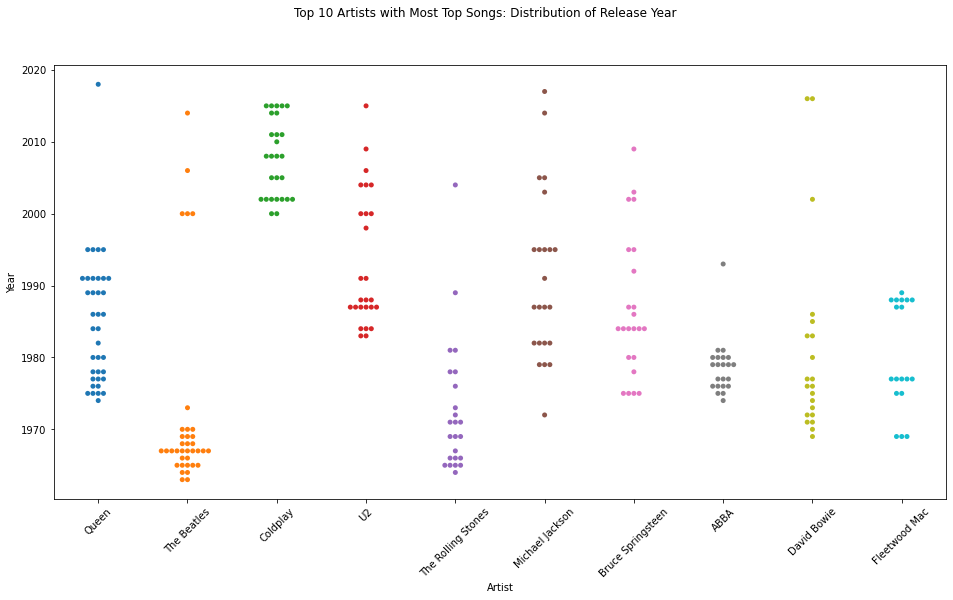

In [50]:
#	Have there been any artists with top songs released in multiple decades?
Queen = df_sp[(df_sp['Artist']=='Queen')]
Beatles = df_sp[(df_sp['Artist']=='The Beatles')]
Coldplay = df_sp[(df_sp['Artist']=='Coldplay')]
U2 = df_sp[(df_sp['Artist']=='U2')]
RS = df_sp[(df_sp['Artist']=='The Rolling Stones')]
MJ = df_sp[(df_sp['Artist']=='Michael Jackson')]
Bruce = df_sp[(df_sp['Artist']=='Bruce Springsteen')]
ABBA = df_sp[(df_sp['Artist']=='ABBA')]
Bowie = df_sp[(df_sp['Artist']=='David Bowie')]
FM = df_sp[(df_sp['Artist']=='Fleetwood Mac')]

top_artists = Queen.append([Beatles, Coldplay, U2, RS, MJ, Bruce, ABBA, Bowie, FM])

fig1 = plt.figure()
fig1.set_size_inches(16,8)
plt.suptitle('Top 10 Artists with Most Top Songs: Distribution of Release Year')
plt.xticks(rotation=45)
sb.swarmplot(x=top_artists['Artist'],y=top_artists['Year'])
plt.show()

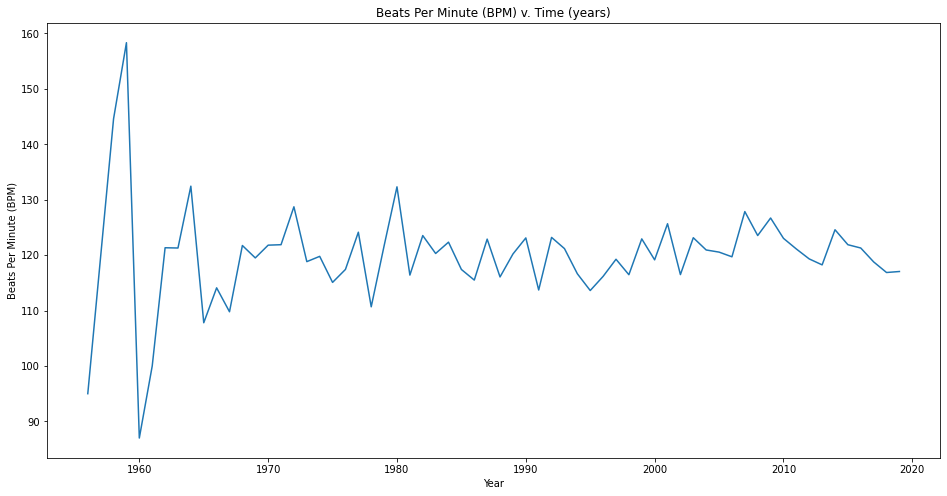

In [51]:
# Has beats per minutes changed throughout the years?
bpm = df_sp.groupby(['Year']).mean()
fig = plt.figure()
fig.set_size_inches(16,8)
plt.plot(bpm.index,bpm['Beats Per Minute (BPM)'])
plt.title('Beats Per Minute (BPM) v. Time (years)')
plt.xlabel("Year")
plt.ylabel("Beats Per Minute (BPM)")
plt.show()

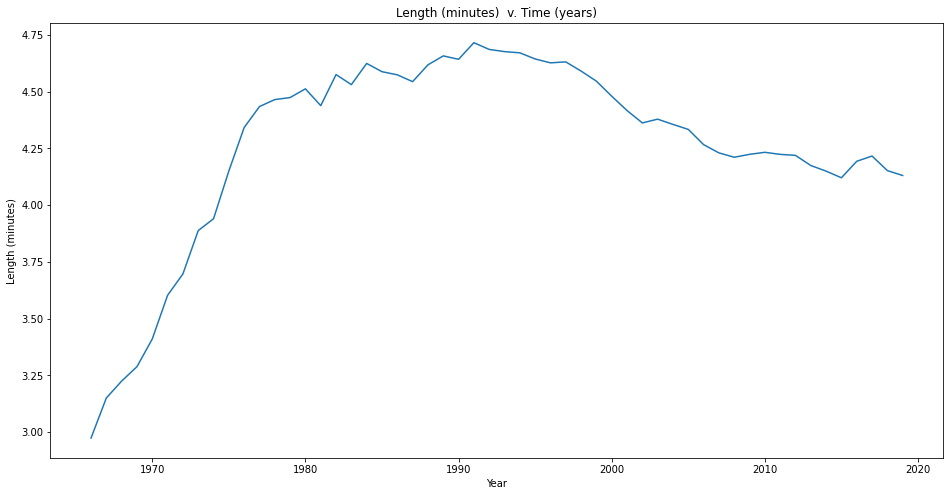

In [52]:
# Has the length of top songs changed throughout the years?
fig = plt.figure()
fig.set_size_inches(16,8)
length = (bpm['Length (Duration)']/60).rolling(10).mean()
plt.plot(bpm.index,length)
plt.title('Length (minutes)  v. Time (years)')
plt.xlabel("Year")
plt.ylabel("Length (minutes)")
plt.show()

4.552188354826104
3.7281893004115227
4.230067001675042


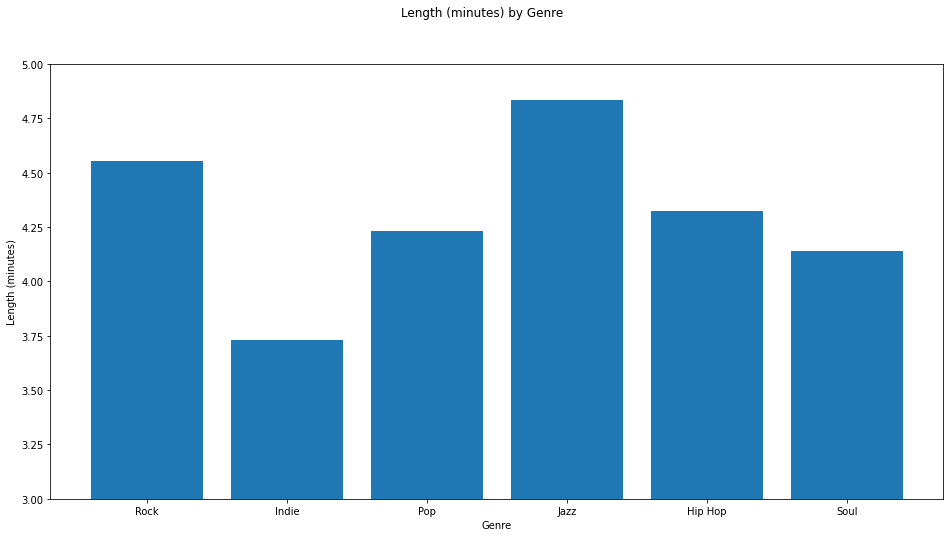

In [34]:
#length by genre

BPM = df_sp.set_index('Top Genre')

#rock
rock = BPM[BPM.index.str.contains('rock')]
rock_mean = rock['Length (Duration)'].mean()
print(rock_mean/60)

#indie
indie = BPM[BPM.index.str.contains('indie')]
indie_mean = indie['Length (Duration)'].mean()
print(indie_mean/60)

#pop
pop = BPM[BPM.index.str.contains('pop')]
pop_mean = pop['Length (Duration)'].mean()
print(pop_mean/60)

#jazz
jazz = BPM[BPM.index.str.contains('jazz')]
jazz_mean = jazz['Length (Duration)'].mean()


#hip hop
hip_hop = BPM[BPM.index.str.contains('hip hop')]
hip_hop_mean = hip_hop['Length (Duration)'].mean()


#soul
soul = BPM[BPM.index.str.contains('soul')]
soul_mean = soul['Length (Duration)'].mean()


mins = [rock_mean/60, indie_mean/60, pop_mean/60, jazz_mean/60, hip_hop_mean/60, soul_mean/60]
genre = ['Rock','Indie','Pop', 'Jazz', 'Hip Hop', 'Soul']

fig = plt.figure()
fig.set_size_inches(16,8)
plt.bar(genre, mins)
plt.suptitle('Length (minutes) by Genre')
plt.xlabel('Genre')
plt.ylabel('Length (minutes)')
plt.ylim([3,5])
plt.show()

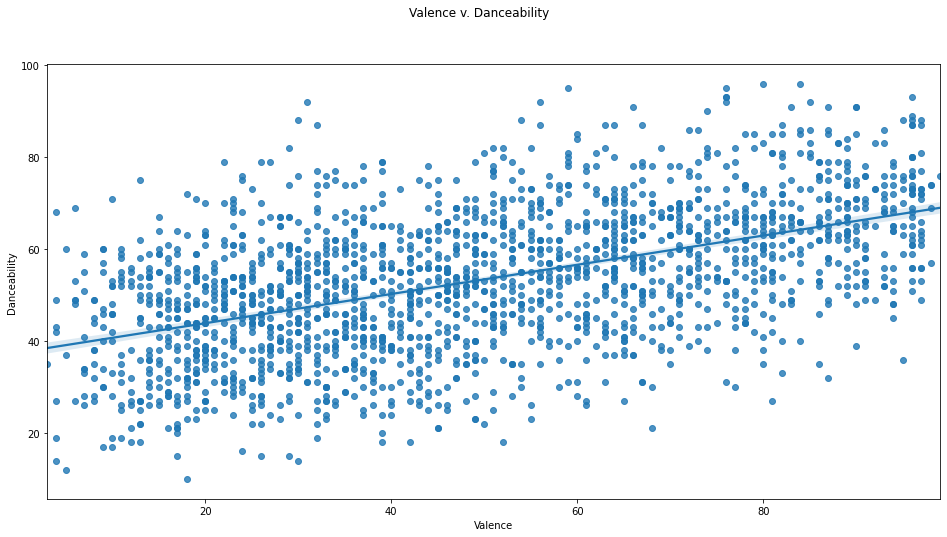

In [53]:
# Does higher valence make a top song more or less danceable?
fig = plt.figure()
fig.set_size_inches(16,8)
sb.regplot(x=df['Valence'],y=df['Danceability'], data=df, fit_reg=True, marker='o')
plt.suptitle('Valence v. Danceability')
plt.show()

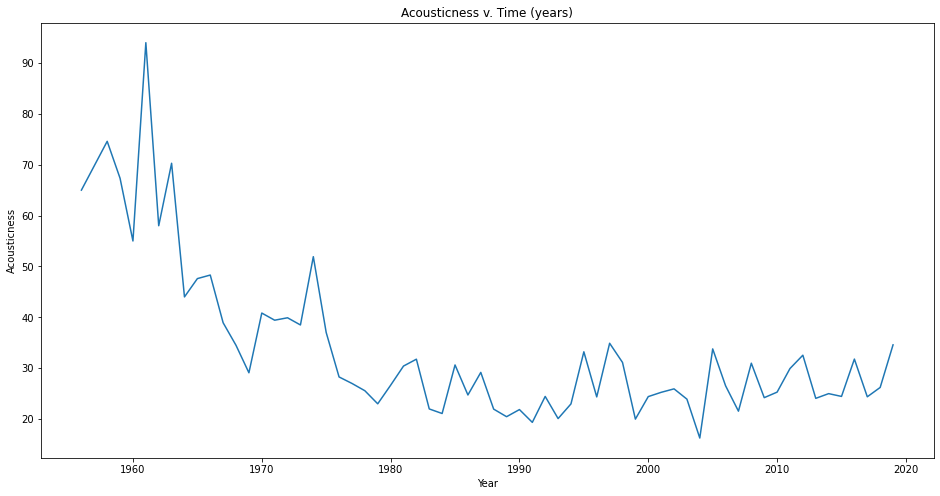

In [55]:
# Have popular songs become more or less acoustic over the years?
fig = plt.figure()
fig.set_size_inches(16,8)
plt.plot(bpm.index,bpm['Acousticness'])
plt.title('Acousticness v. Time (years)')
plt.xlabel("Year")
plt.ylabel("Acousticness")
plt.show()